# Star Classification

We have several columns : 

- obj_ID : Object identifier 
- alpha : Rigth ascension angle
- delta : Declination angle
- u : Ultaviolet filter in the photometric system
- g : Green filter in the photometric system
- r : Red filter in the photometric system
- i : Near infered filter in the photometric system
- z : Infrared filter in the photometric system
- run_ID : Run number used to identify specific scan
- rerun_ID : Rerun number used to specify how the image was processed
- calm_col : Camera column to identify scanline within the run 
- field_ID : Field number to identify each field
- spec_obj_ID : Unique ID used to optical spectroscopic object
- class : Object class (galaxy, quasar, star)
- redshift : Redshift value based on the increase in wavelength
- plate : Identify each plate in SDSS
- MJD : Modified "Julian" date, used to indicate when a given piece of SDSS data was taken
- fiber_ID : Identify the fiber that pointed the ligth at the focal plane in each observation   

In [1]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Read data
data = pd.read_csv("star_classification.csv")
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#Column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

We have 18 columns, 10 float type columns, 7 int type columns and 1 object type which is our target. It would seem we have no NaN in our dataset.

In [5]:
#Percent of NaN values
data.isna().sum()/data.shape[0]

obj_ID         0.0
alpha          0.0
delta          0.0
u              0.0
g              0.0
r              0.0
i              0.0
z              0.0
run_ID         0.0
rerun_ID       0.0
cam_col        0.0
field_ID       0.0
spec_obj_ID    0.0
class          0.0
redshift       0.0
plate          0.0
MJD            0.0
fiber_ID       0.0
dtype: float64

We have not NaN values in our dataset.

In [6]:
#Number of unique value for int type features
for col in data.select_dtypes('int64').columns :
    print(f"{col} -> {data[col].nunique()}") 

run_ID -> 430
rerun_ID -> 1
cam_col -> 6
field_ID -> 856
plate -> 6284
MJD -> 2180
fiber_ID -> 1000


We have only one value for rerun_ID column. And cam_col column can be interpreted as a categorical features.  
Well, we can drop rerun_ID and spec_obj_ID (individual for every entry).

In [7]:
#Drop useless features
data.drop(['spec_obj_ID', 'rerun_ID'], axis = 1, inplace = True)

In [8]:
#Convert target to numeric
def target(c) : 
    if c == "GALAXY" :
        return 0
    elif c == "STAR" : 
        return 1
    else : 
        return 2

data['class'] = data['class'].map(target)

### Exploratory data analysis

First, wa can check the dataset target repartition.

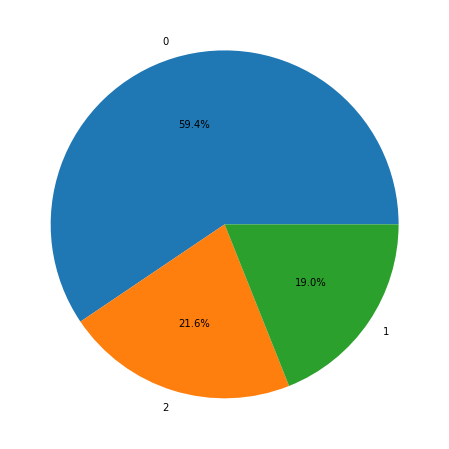

In [9]:
#Target balance
plt.figure(figsize = (12,8))
plt.pie(data['class'].value_counts(), labels = data['class'].unique(), autopct = "%1.1f%%")
plt.show()

In [10]:
#Statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217913e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
cam_col,100000.0,3.511610e+00,1.586912e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00


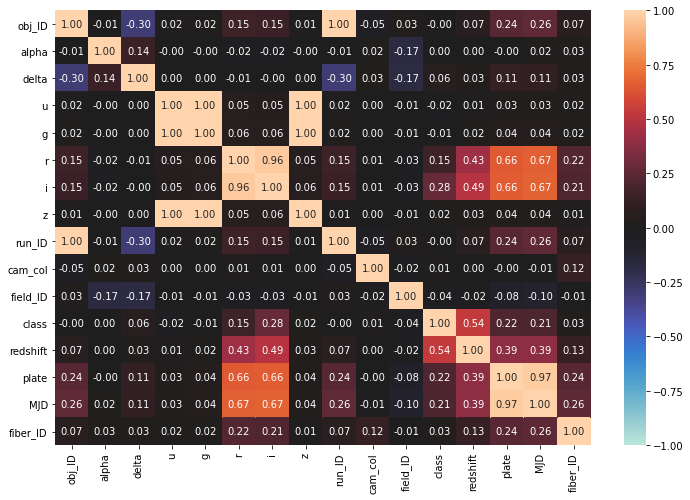

In [11]:
#Features correlation
plt.figure(figsize = (12,8))
sb.heatmap(data.corr(), annot = True, fmt = '.2f', vmax = 1, vmin = -1, center = 0)
plt.show()

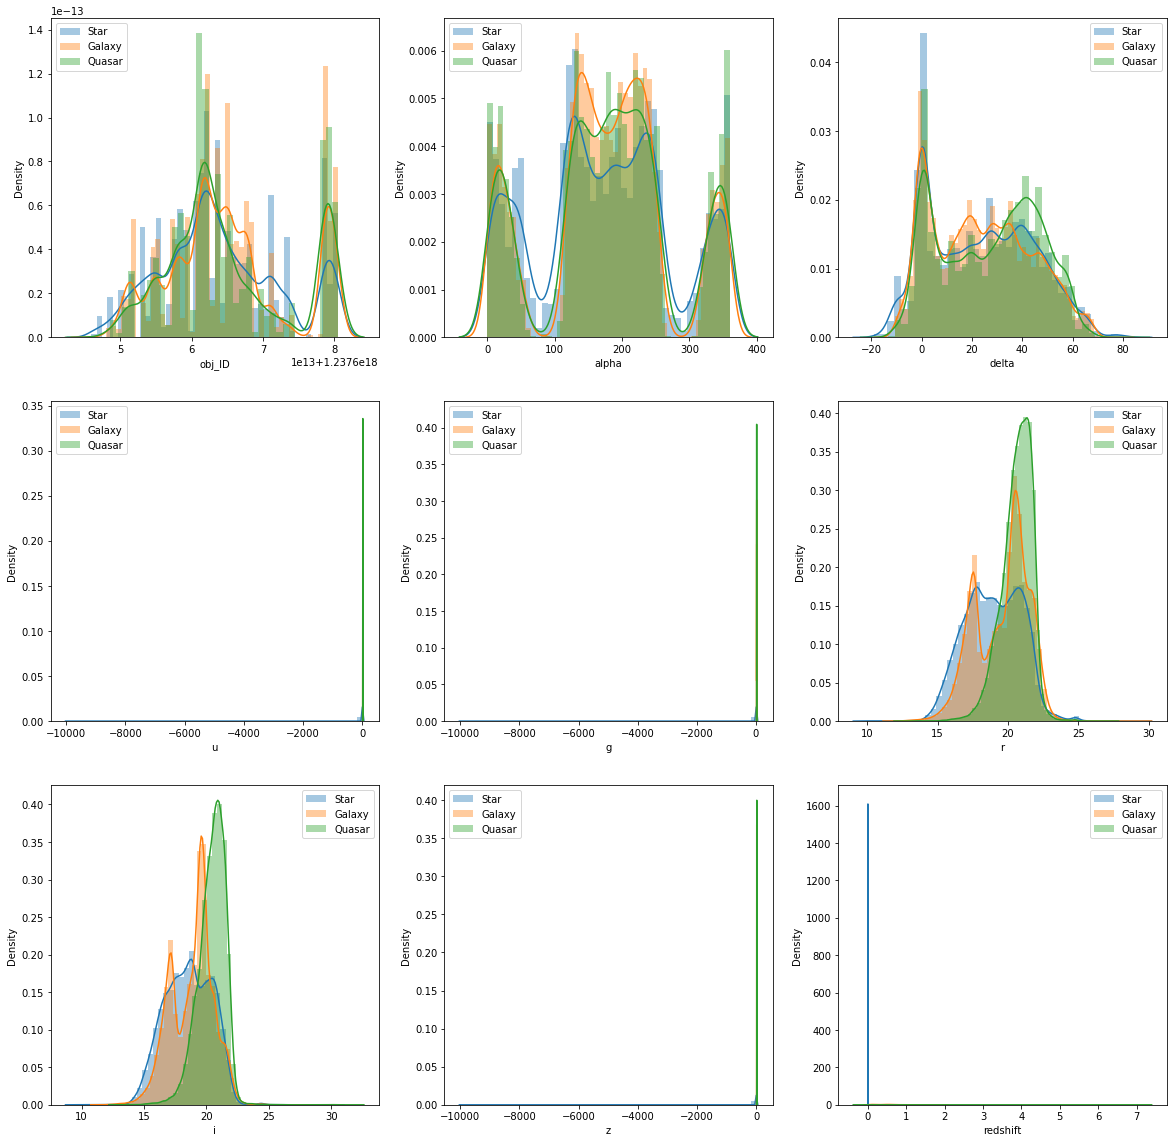

In [12]:
#Data distribution 
star_df = data[data['class'] == 1]
galaxy_df = data[data['class'] == 0]
quasar_df = data[data['class'] == 2]


plt.figure(figsize=(20,20))
for index, col in enumerate(data.select_dtypes('float64').columns) : 
    plt.subplot(3, 3, index+1)
    sb.distplot(star_df[col], label="Star")
    sb.distplot(galaxy_df[col], label="Galaxy")
    sb.distplot(quasar_df[col], label="Quasar")
    plt.legend()
plt.show()

### Preprocessing

In [13]:
#Imports 
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [14]:
#Outliers detection
clf = LocalOutlierFactor()
y_pred_out = pd.DataFrame(clf.fit_predict(data), columns = ['Outliers'])

outlier_index = y_pred_out[y_pred_out['Outliers'] == -1].index.tolist()
print(len(outlier_index))

data.drop(outlier_index, inplace = True)

571


In [15]:
#Class correlation after droping outliers
data.corr()['class'].sort_values()

field_ID   -0.037942
u          -0.017609
g          -0.005831
run_ID      0.000650
obj_ID      0.000651
alpha       0.004795
cam_col     0.015083
z           0.017370
fiber_ID    0.032422
delta       0.056799
r           0.152290
MJD         0.209006
plate       0.217526
i           0.286153
redshift    0.537818
class       1.000000
Name: class, dtype: float64

In [16]:
#Drop useless features 
data = data[['delta', 'r', 'MJD', 'plate', 'i', 'redshift', 'class']]

In [17]:
#Dealing with imbalanced data
x = data.drop('class', axis = 1).values
y = data['class'].values

sm = SMOTE()
print('Original dataset shape :', Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape :', Counter(y))

Original dataset shape : Counter({0: 59191, 1: 21371, 2: 18867})
Resampled dataset shape : Counter({0: 59191, 2: 59191, 1: 59191})


In [18]:
#Data scaling 
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
#Split into tran and test set
(X_train, 
 X_test,
 y_train,
 y_test) = train_test_split(x, y, train_size=0.70, random_state=10)

In [20]:
#Shape verification 
for i, y in zip([y_train, y_test], ["train", "test"]) : 
    print(f"Shape of {y} set is {i.shape}")

Shape of train set is (124301,)
Shape of test set is (53272,)


### Modelization

We will initialize severals classifier to show basic result and after tune algorithm to find the best. Since we use SMOTE, our target data is balanced, so we can use precision as metrics to evaluate model performance.

In [21]:
#RandomForest
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)
model_RandomForest.score(X_test, y_test)

0.9810782399759723

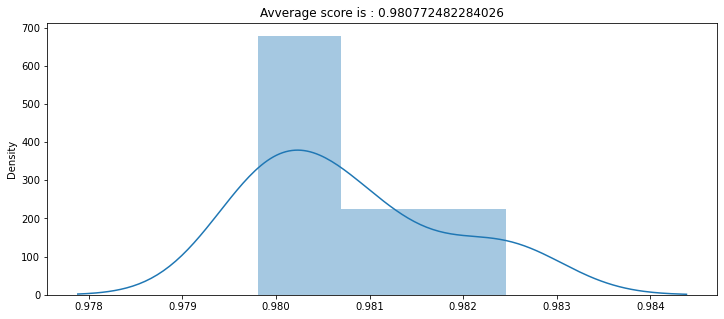

In [22]:
#Cross validation score 
cv_score = cross_val_score(model_RandomForest, X_train, y_train, cv=10)
plt.figure(figsize=(12,5))
sb.distplot(cv_score)
plt.title(f"Avverage score is : {np.mean(cv_score)}")
plt.show()

In [23]:
#Check classification performance
y_pred = model_RandomForest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17758
           1       1.00      1.00      1.00     17806
           2       0.98      0.96      0.97     17708

    accuracy                           0.98     53272
   macro avg       0.98      0.98      0.98     53272
weighted avg       0.98      0.98      0.98     53272



In [24]:
#Bagging classifier
model_Bagging = BaggingClassifier()
model_Bagging.fit(X_train, y_train)
model_Bagging.score(X_test, y_test)

0.9783939029884366

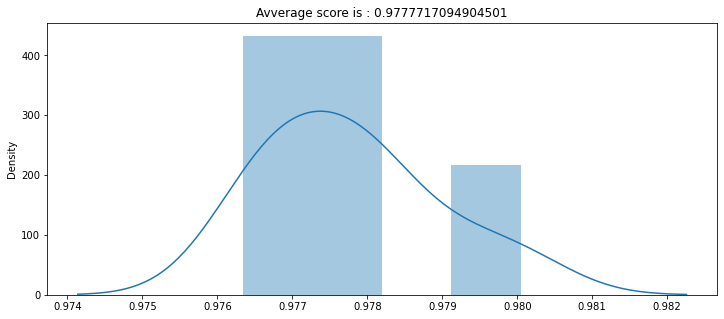

In [25]:
#Cross validation score 
cv_score = cross_val_score(model_Bagging, X_train, y_train, cv=10)
plt.figure(figsize=(12,5))
sb.distplot(cv_score)
plt.title(f"Avverage score is : {np.mean(cv_score)}")
plt.show()

In [26]:
#Check classification performance
y_pred = model_Bagging.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17758
           1       1.00      1.00      1.00     17806
           2       0.98      0.96      0.97     17708

    accuracy                           0.98     53272
   macro avg       0.98      0.98      0.98     53272
weighted avg       0.98      0.98      0.98     53272



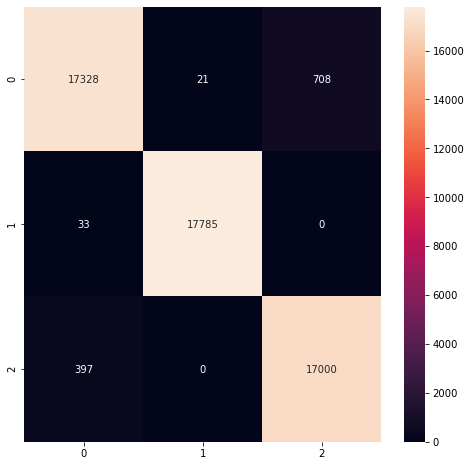

In [27]:
model_Bagging.fit(X_train, y_train)
y_pred = model_Bagging.predict(X_test)

plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt = 'g')
plt.show()

### Conclusion